In [4]:
import os
import numpy as np
from data.gestures import linear_accelerometer
from iotai_sensor_classification.recording import read_recordings
from iotai_sensor_classification.preprocess import parse_recording
from iotai_sensor_classification.plot_util import column_histograms, plot_columns
from iotai_sensor_classification.recording import read_recordings
from iotai_sensor_classification.normalization import normalize_mean_std_dict
from iotai_sensor_classification import encode
from iotai_sensor_classification.recording import get_recording_names, filter_columns

In [5]:
def gesture_recordings():
    """Read gesture recordings for all tests in file."""
    recordings_dir = os.path.dirname(linear_accelerometer.__file__)
    recordings = read_recordings(recordings_dir=recordings_dir)
    return recordings

gesture_recordings_ = gesture_recordings()
gesture_recordings_.keys()

dict_keys(['rock', 'supination', 'scoop', 'shake', 'circle'])

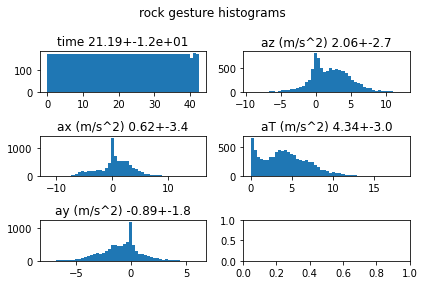

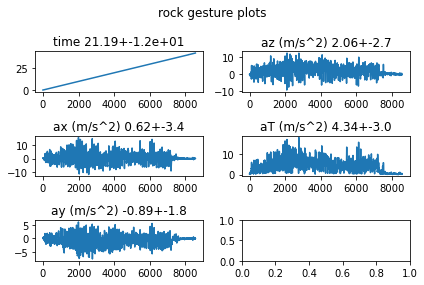

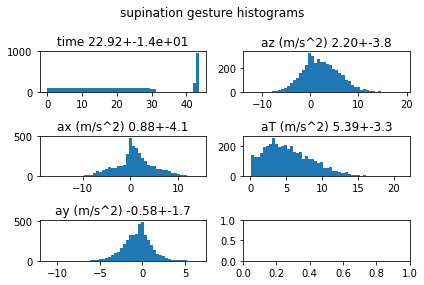

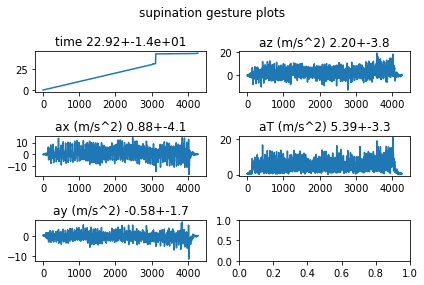

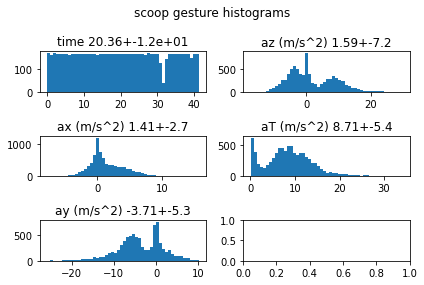

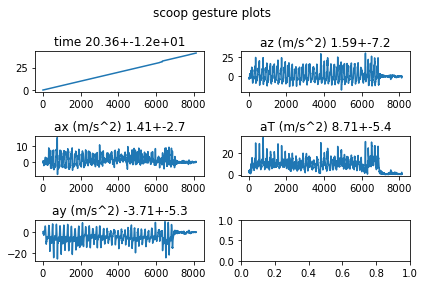

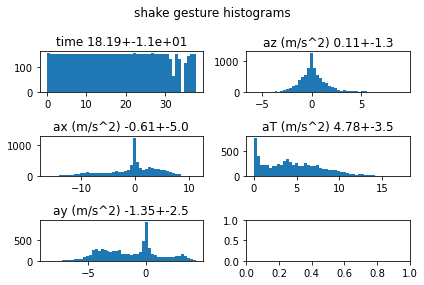

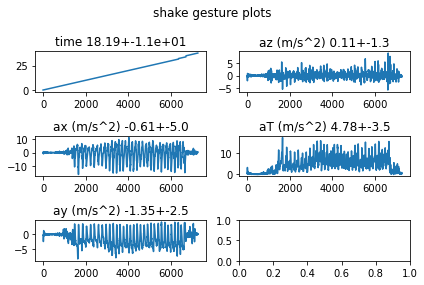

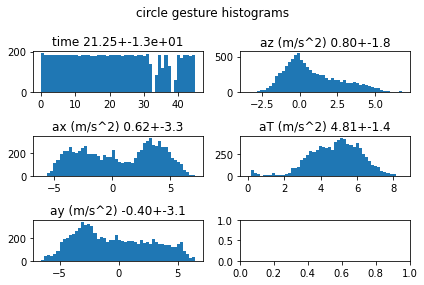

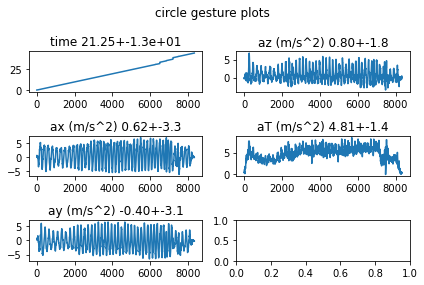

In [6]:
def test_read_gestures(gesture_recordings):
    """Test reading gesture recordings."""
    gestures = gesture_recordings.keys()
    assert "shake" in gestures
    assert "rock" in gestures
    test_output = os.path.join("test_output", "gestures", "raw")
    os.makedirs(test_output, exist_ok=True)
    for gesture in gestures:
        gesture_data = gesture_recordings[gesture]
        assert all(gesture_data["label"] == gesture)
        column_histograms(gesture_data, name=f"{gesture} gesture")
        plot_columns(gesture_data, name=f"{gesture} gesture")

test_read_gestures(gesture_recordings_)

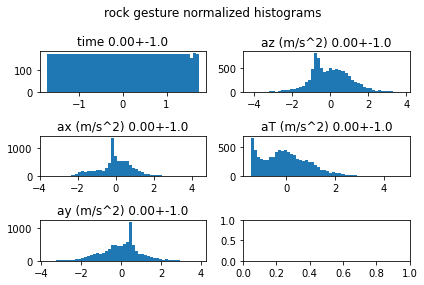

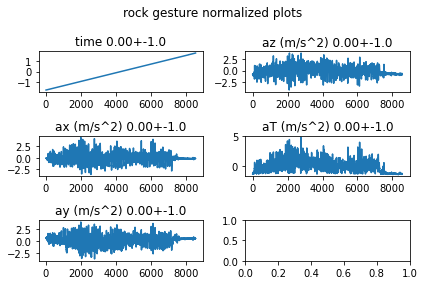

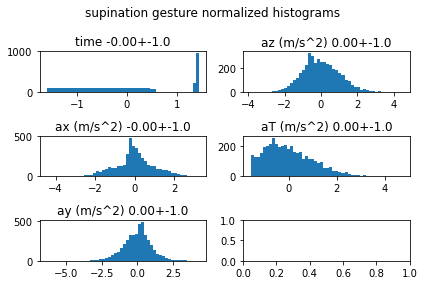

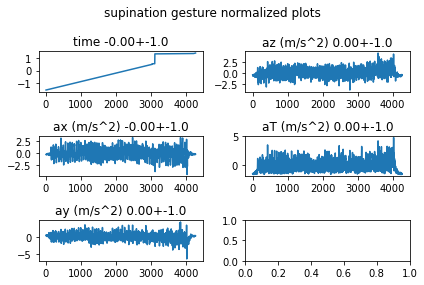

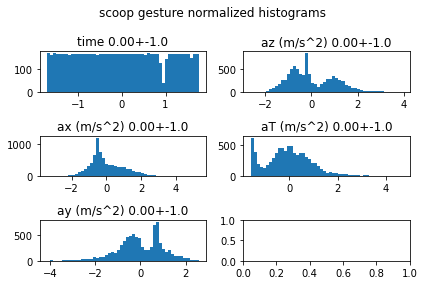

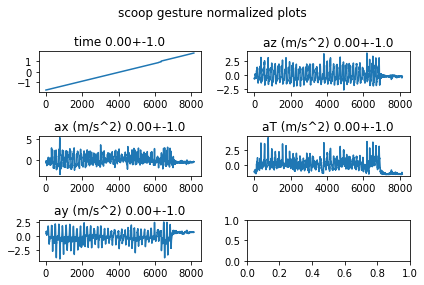

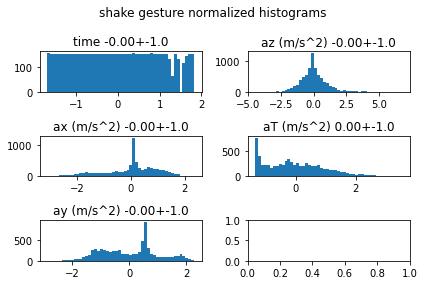

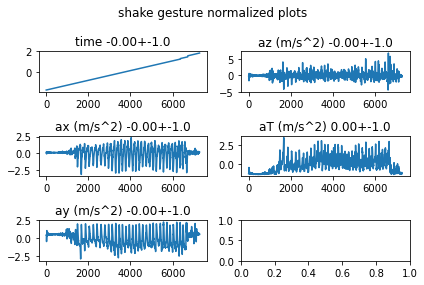

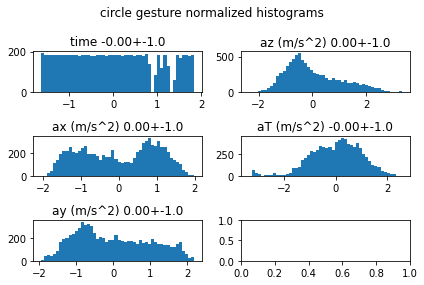

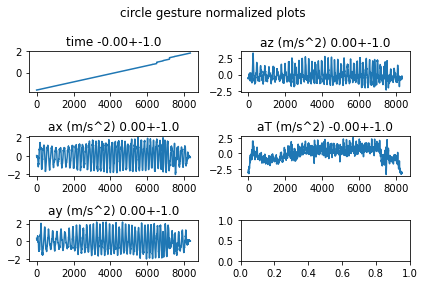

In [7]:
def test_normalize_gesture_data():
    recordings_dir = os.path.dirname(linear_accelerometer.__file__)
    raw_gestures = read_recordings(recordings_dir=recordings_dir)
    normalized_gestures = normalize_mean_std_dict(raw_gestures)
    test_output = os.path.join("test_output", "gestures", "normalized")
    os.makedirs(test_output, exist_ok=True)
    for gesture in normalized_gestures.keys():
        normalized = normalized_gestures[gesture]
        column_histograms(normalized, name=f"{gesture} gesture normalized")
        plot_columns(normalized, name=f"{gesture} gesture normalized")
        # https://numpy.org/doc/stable/reference/generated/numpy.allclose.html
        assert np.allclose(normalized.mean(), 0.0)
        assert np.allclose(normalized.std(), 1.0)

test_normalize_gesture_data()

In [8]:
def gesture_names():
    recordings_dir = os.path.dirname(linear_accelerometer.__file__)
    return get_recording_names(recordings_dir, ext=".csv.gz")

gesture_names_ = gesture_names()
gesture_names_

['rock', 'supination', 'scoop', 'shake', 'circle']

In [9]:
# def test_label_encoder(gesture_names):
#    """Test label encoder."""
label_coder = encode.LabelCoder()
one_hot_gestures = label_coder.encode_labels(gesture_names_)
decoded_gestures = label_coder.decode_one_hots(one_hot_gestures)
assert all(decoded_gestures == gesture_names_)
print(one_hot_gestures)
print(decoded_gestures)

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]
['rock' 'supination' 'scoop' 'shake' 'circle']


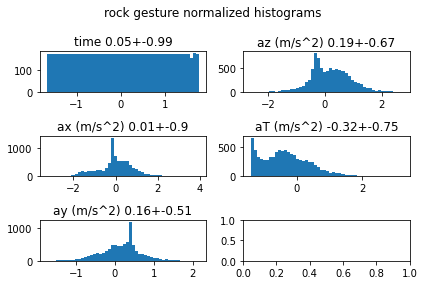

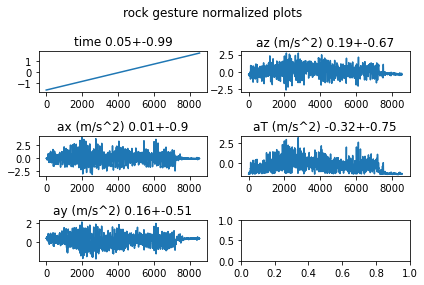

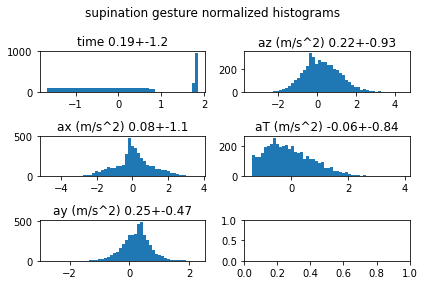

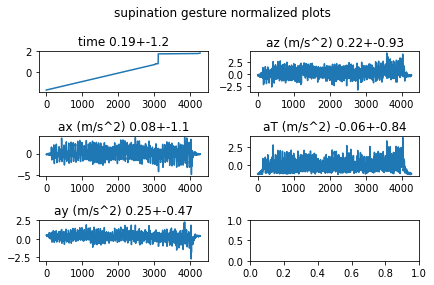

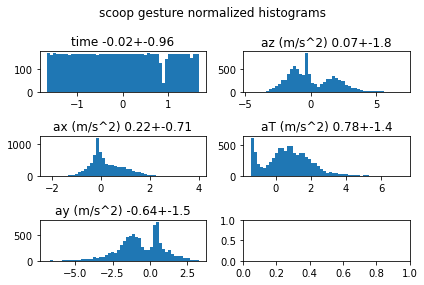

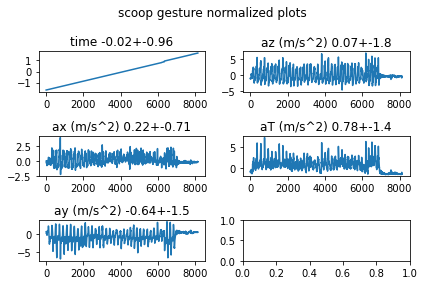

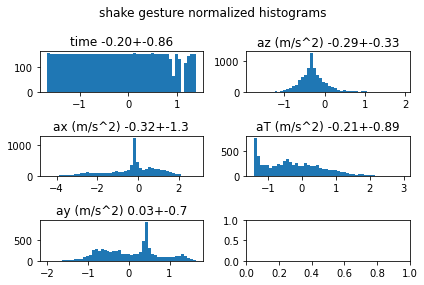

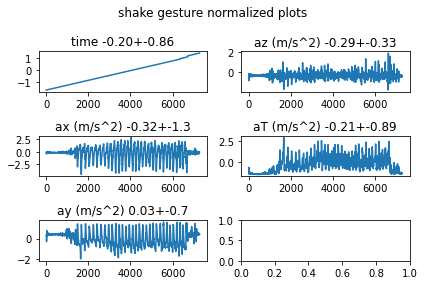

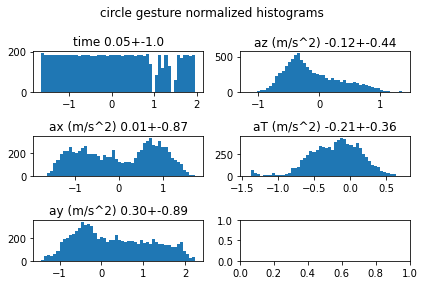

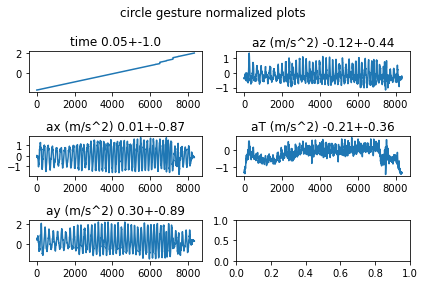

In [10]:
# def test_parse_gestures(gesture_recordings):
#     """Test parsing gesture data creating labels into a dataset for training and or testing models."""
parsed_gestures, label_coder = parse_recording(gesture_recordings_)
assert all(label_coder.decode_one_hots(parsed_gestures["label_code"]) == parsed_gestures["label"])
parsed_numbers = filter_columns(parsed_gestures)
assert all(np.isclose(parsed_numbers.mean(axis=0), 0.0))
assert all(np.isclose(parsed_numbers.std(axis=0), 1.0))
gesture_names = parsed_gestures['label'].unique()
test_output = os.path.join("test_output", "gestures", "preprocessed")
os.makedirs(test_output, exist_ok=True)
for gesture_name in gesture_names:
    gesture_rows = parsed_gestures.loc[parsed_gestures['label'].isin([gesture_name])]
    column_histograms(gesture_rows, name=f"{gesture_name} gesture normalized")
    plot_columns(gesture_rows, name=f"{gesture_name} gesture normalized")